In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Taller 6

Métodos Computacionales, 2015-19

Sebastián Puerto, 201318518

Lectura de archivo:

In [2]:
data = np.genfromtxt('datos_caminata.csv', delimiter = ';')

In [3]:
lons = data[:, 0]
lats = data[:, 1]
years = data[:, 2]
months = data[:, 3]
days = data[:, 4]
hours = data[:, 5]
minutes = data[:, 6]
seconds = data[:, 7]

Para cambio de coordenadas:

In [4]:
R = 6.3674447E6 #metros

def xyz(lon, lat, r = R):
    # Función para cambio de coordenadas geográficas a cartesianas
    
    return array([r*np.sin(np.pi/180. * (90 - lat))*cos(np.pi/180. * (lon)),
                  r*np.sin(np.pi/180. * (90 - lat))*sin(np.pi/180. * (lon)),
                  r*np.cos(np.pi/180. * (90 - lat))]
                  )

xyz_vec = np.vectorize(xyz)

Vectores de desplazamiento espacio temporales:

In [5]:
poss = array([xyz(lons[i], lats[i], R) for i in range(len(lons))])

r_0 = xyz(lons[0], lats[0], R)
t_0 = seconds[0] + 60 * minutes[0] + 3600 * hours[0]

disps = poss - r_0
dtimes = array([(seconds[i] - seconds[0]) + 
                60 * (minutes[i] - minutes[0]) + 
                3600 * (hours[i] - hours[0]) 
               for i in range(len(lons))])

#vects = array([np.append(disps[i], dtimes[i]) for i in range(len(lons))])
vects = array([array([disps[i, 1], disps[i, 2], dtimes[i]]) for i in range(len(lons))])

Vector Unitario y coordenadas de los vectores de desplazamiento espacio temporales

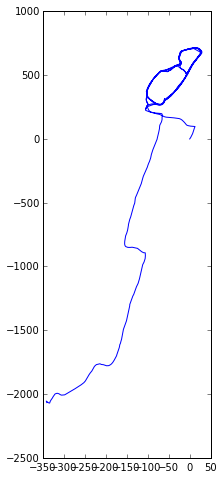

In [10]:
# Una proyección en el plano tangente es simplemente eliminación de
# la otra coordenada, en micaso x, ya que es ortogonal, es decir 
# que mis vectoers unitarios son vectores de 1m en direcciones 
# norte y oriente
plt.figure(1, figsize = (3, 8))
plt.plot(vects[:, 0], vects[:, 1]) 
#plt.axis('scaled')

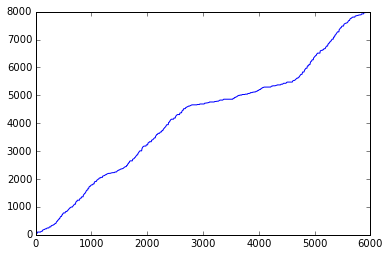

In [15]:
dys = (np.roll(vects, -1, axis = 0) - vects)[:-1, 0]
dzs = (np.roll(vects, -1, axis = 0) - vects)[:-1, 1]

distancias = {}

def distancia(t):
    i = 0
    
    if t >= dtimes[-1]:
        i = len(dtimes) - 1
        
    else:
        while t >= dtimes[i + 1]:
            i += 1
        
    t_efectivo = dtimes[i]
    
    if t_efectivo == 0:
        return 0.
    
    if t_efectivo not in distancias:
        suma = np.sqrt(dys[i - 1]**2 + dzs[i - 1]**2) + distancia(dtimes[i - 1])
        distancias[t_efectivo] = suma
      
    return distancias[t_efectivo]

fig_2 = plt.figure('distancia vs tiempo')
ax = fig_2.add_subplot(111)
t = np.linspace(0, max(dtimes), 1000)
d = array([distancia(e) for e in t])

ax.plot(t, d)

In [27]:
def indice(d):
    # Calcula el tiempo que se requiere para calcular una 
    # distancia dada en metros
    if d >= distancia(dtimes[-1]):
        return vects[-1]
                         
    t = 0
    i = 0
    
    while distancia(t) < d:
        i += 1
        t = dtimes[i]
    
    return vects[i]

print indice(8000)/array([1, 1, 3600])

distancias_a_calcular = np.arange(10)*1000
#print np.arange(10)*1000
tiempos_distancia = array([indice(d) for d in distancias_a_calcular])/3600
print tiempos_distancia

[ -3.41274623e+02  -2.06731561e+03   1.65416667e+00]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -1.39734240e-02   1.52173384e-01   1.84166667e-01]
 [ -9.56643106e-04   1.46554197e-01   3.15555556e-01]
 [  3.98203130e-05   1.54344766e-01   5.18611111e-01]
 [  2.23655481e-03   1.65949923e-01   6.62222222e-01]
 [ -2.83883017e-03   1.45541863e-01   1.01750000e+00]
 [ -3.03684652e-02  -7.79063786e-02   1.35222222e+00]
 [ -3.77553060e-02  -3.42261973e-01   1.47611111e+00]
 [ -9.47985063e-02  -5.74254336e-01   1.65416667e+00]
 [ -9.47985063e-02  -5.74254336e-01   1.65416667e+00]]


In [9]:
print dtimes

[  0.00000000e+00   2.00000000e+00   1.00000000e+01 ...,   5.95200000e+03
   5.95400000e+03   5.95500000e+03]


In [28]:
print distancia(2)
print indice(distancia(2))

10.7937721504
[  2.21738123  10.56355706   2.        ]
